In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Upload all data being compared.

In [2]:
hpi=pd.read_csv('../data/corrected_hpi_2000-2020.csv')
zip0=pd.read_csv('../data/zip0.csv')
zip1=pd.read_csv('../data/zip1.csv')
zip2=pd.read_csv('../data/zip2.csv')
zip3=pd.read_csv('../data/zip3.csv')
zip4=pd.read_csv('../data/zip4.csv')
zip5=pd.read_csv('../data/zip5.csv')
zip6=pd.read_csv('../data/zip6.csv')
zip7=pd.read_csv('../data/zip7.csv')
zip8=pd.read_csv('../data/zip8.csv')
zip9=pd.read_csv('../data/zip9.csv')

2. Seperate HPI by single digit zip.

In [3]:
hpi_zip0=hpi[hpi['one-digit ZIP']=='new england']
hpi_zip1=hpi[hpi['one-digit ZIP']=='northeast']
hpi_zip2=hpi[hpi['one-digit ZIP']=='mid atlantic']
hpi_zip3=hpi[hpi['one-digit ZIP']=='southeast']
hpi_zip4=hpi[hpi['one-digit ZIP']=='midwest']
hpi_zip5=hpi[hpi['one-digit ZIP']=='northern plains']
hpi_zip6=hpi[hpi['one-digit ZIP']=='plains']
hpi_zip7=hpi[hpi['one-digit ZIP']=='south central']
hpi_zip8=hpi[hpi['one-digit ZIP']=='western']
hpi_zip9=hpi[hpi['one-digit ZIP']=='pacific']

3. Merge data on matching zips.

In [4]:
zip0_hpi_merge = pd.merge(hpi_zip0,zip0,on='Year')
zip1_hpi_merge = pd.merge(hpi_zip1,zip1,on='Year')
zip2_hpi_merge = pd.merge(hpi_zip2,zip2,on='Year')
zip3_hpi_merge = pd.merge(hpi_zip3,zip3,on='Year')
zip4_hpi_merge = pd.merge(hpi_zip4,zip4,on='Year')
zip5_hpi_merge = pd.merge(hpi_zip5,zip5,on='Year')
zip6_hpi_merge = pd.merge(hpi_zip6,zip6,on='Year')
zip7_hpi_merge = pd.merge(hpi_zip7,zip7,on='Year')
zip8_hpi_merge = pd.merge(hpi_zip8,zip8,on='Year')
zip9_hpi_merge = pd.merge(hpi_zip9,zip9,on='Year')

4. Combine all data back to common dataframe.

In [5]:
ZIP_VS_HPI = pd.concat([zip0_hpi_merge,zip1_hpi_merge,zip2_hpi_merge,zip3_hpi_merge,zip4_hpi_merge,zip5_hpi_merge,zip6_hpi_merge,zip7_hpi_merge,zip8_hpi_merge,zip9_hpi_merge])

5. Rename columns for clarity. 

In [6]:
new_column_names = {'HPI':'1975 HPI base','Annual Change (%)':'Year by year HPI percent change','percent_change':'employment year by year percent change'}

In [7]:
ZIP_VS_HPI.rename(columns=new_column_names,inplace=True)

In [8]:
ZIP_VS_HPI = ZIP_VS_HPI.fillna(0)

In [9]:
ZIP_VS_HPI = ZIP_VS_HPI.drop(['1975 HPI base','Year by year HPI percent change'],axis=1)

6. Create pivot tables for use in graphs.

In [10]:
HPI_2000_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='HPI with 2000 base', index='Year', columns='one-digit ZIP')
employment_percent_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='employment_by_thosands', index='Year', columns='one-digit ZIP')

7. Create some base visuals for possible use.

<AxesSubplot:xlabel='Year'>

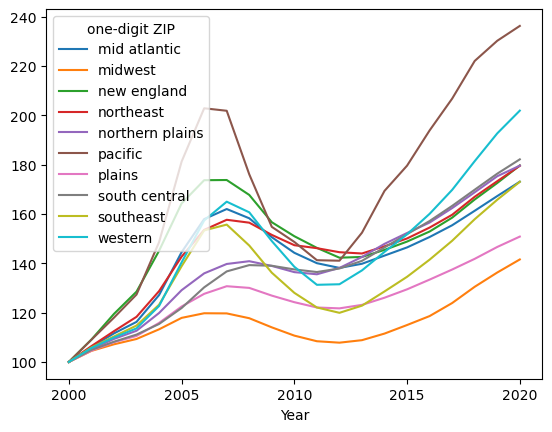

In [11]:
HPI_2000_pivot_table.plot(kind='line',xticks=[2000,2005,2010,2015,2020])

<AxesSubplot:xlabel='Year'>

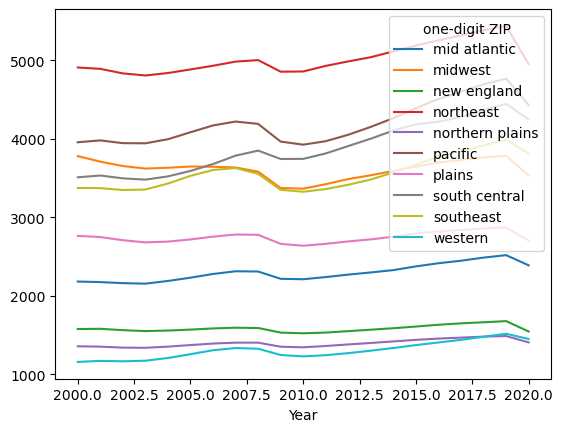

In [12]:
employment_percent_pivot_table.plot(kind='line')

In [13]:
HPI_Percent_change_since_2000_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='Percent change since 2000', index='Year', columns='one-digit ZIP')

In [14]:
HPI_Percent_change_since_2000_pivot_table

one-digit ZIP,mid atlantic,midwest,new england,northeast,northern plains,pacific,plains,south central,southeast,western
Year,,,,,,,,,,
2000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2001,6.091319,4.482366,9.081169,6.412784,5.159884,9.011477,4.590349,4.884000,5.875667,5.654521
2002,11.572198,7.150000,19.488961,12.476701,9.336512,17.965795,8.019070,8.198778,10.325889,9.889863
2003,16.243736,9.308172,28.511558,18.298866,12.643372,27.343523,10.533140,11.088333,14.749667,13.614110
2004,27.126374,13.226344,45.091299,28.717113,19.841860,48.577500,15.815698,15.395667,23.196333,22.690685
2005,44.529231,17.867634,64.293896,42.699897,29.108837,81.271818,22.481047,21.866778,38.837222,40.384795
2006,57.940000,19.742151,73.714675,53.560103,35.925465,102.894205,27.622442,30.249222,53.346000,57.378493
2007,62.022308,19.683656,73.794156,57.659381,39.735349,101.881818,30.713488,36.716889,55.707778,65.004521
2008,58.268462,17.731290,67.743247,56.486598,40.857791,76.097273,30.029419,39.271444,47.212667,60.685753


In [15]:
colors=['pink', 'dark yellow', 'dark blue', 'orange','light blue','purple','green','dark pink','yellow','blue']

<AxesSubplot:title={'center':'HPI Percentage Change Since 2000'}, xlabel='Year'>

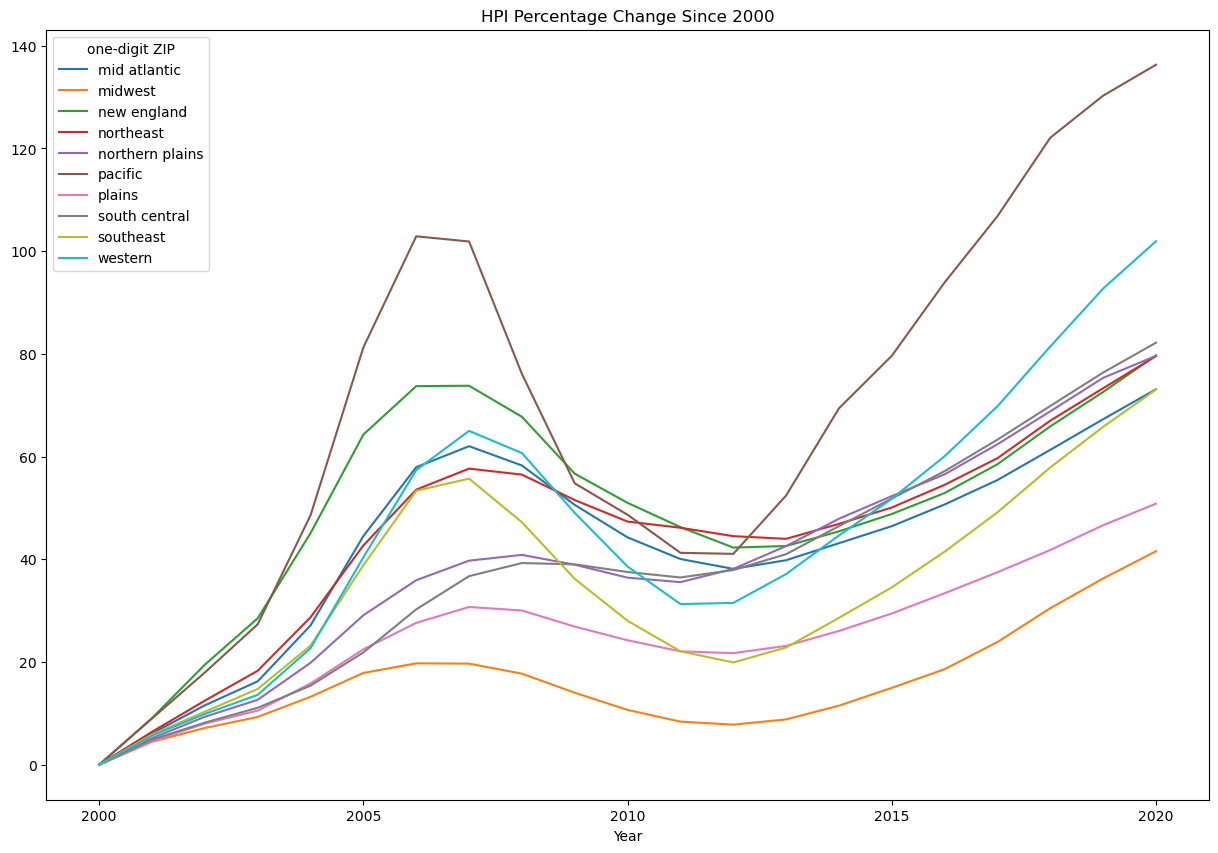

In [41]:
HPI_Percent_change_since_2000_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='HPI Percentage Change Since 2000')

In [17]:
Employment_Percent_change_since_2000_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='employment percent change since 2000', index='Year', columns='one-digit ZIP')

<AxesSubplot:title={'center':'Employment Percentage Change Since 2000'}, xlabel='Year'>

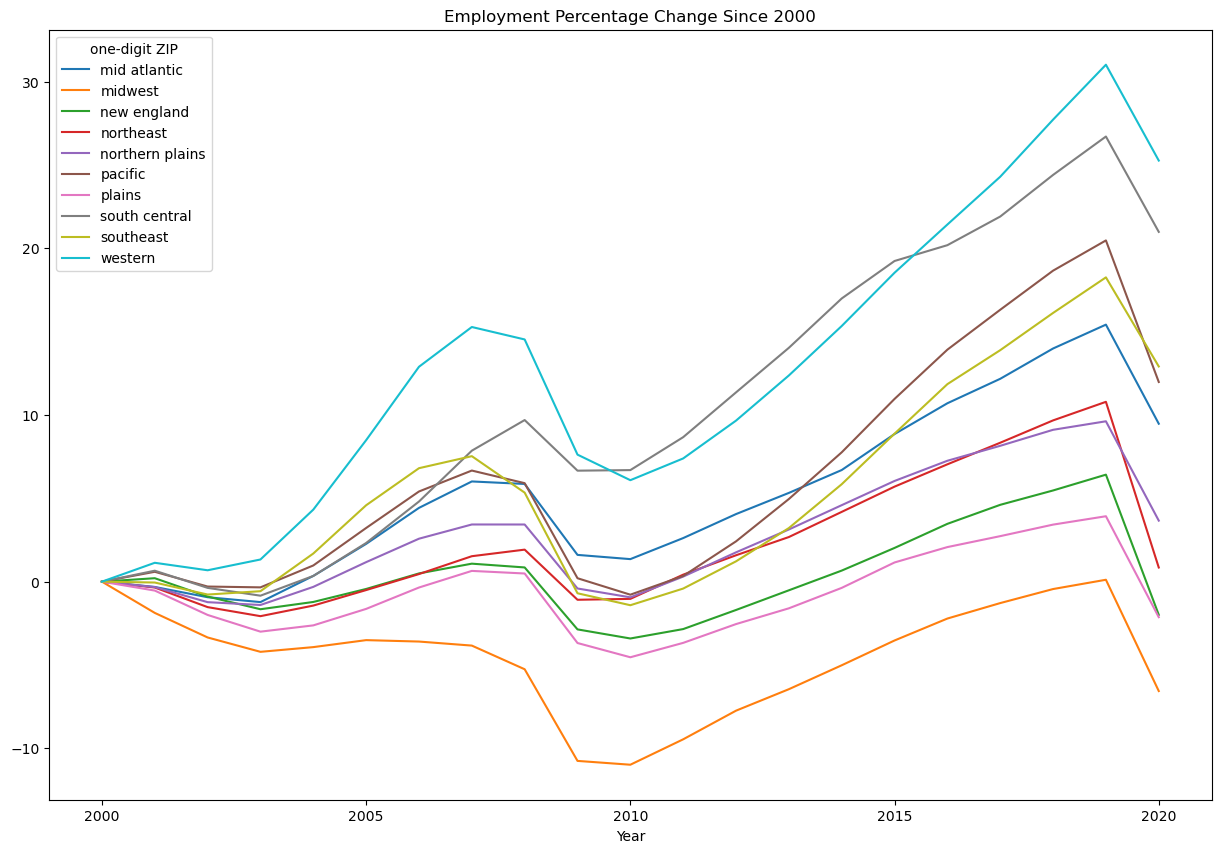

In [40]:
Employment_Percent_change_since_2000_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='Employment Percentage Change Since 2000')

In [19]:
sum_of_employment_years_2000_2020 = ZIP_VS_HPI.groupby('Year')['employment_by_thosands'].sum().reset_index()

<AxesSubplot:xlabel='Year'>

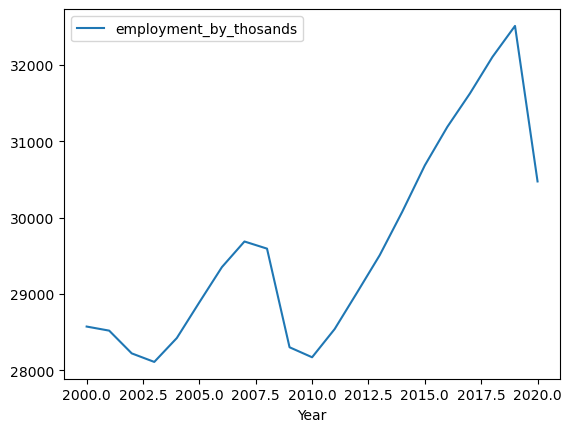

In [20]:
sum_of_employment_years_2000_2020.plot(x='Year',y='employment_by_thosands', kind='line')

8. Explore averages over the years being examined.

In [21]:
year2020 = ZIP_VS_HPI[ZIP_VS_HPI['Year']==2020]
years2010_2020 = ZIP_VS_HPI[ZIP_VS_HPI['Year']>=2010]
years2000_2010 = ZIP_VS_HPI[ZIP_VS_HPI['Year']<=2010]

In [22]:
years2000_2010['employment year by year percent change'].mean()

-0.07583171238471612

In [23]:
years2010_2020['employment year by year percent change'].mean()

0.6870299144842564

In [24]:
year2020['employment percent change since 2000'].mean()

7.445616678972295

In [25]:
ZIP_VS_HPI['employment year by year percent change'].mean()

0.3465122619820257

In [26]:
year2020['Percent change since 2000'].mean()

79.78939357049266

In [27]:
ZIP_VS_HPI

,one-digit ZIP,Year,HPI with 2000 base,Percent change since 2000,HPI year by year percent change since 2000,Percent change since 2010,employment_by_thosands,employment year by year percent change,employment percent change since 2000,employment percent change since 2010
0,new england,2000,100.000000,0.000000,0.000000,-33.770619,1576.701190,0.000000,0.000000,3.531679
1,new england,2001,109.081169,9.081169,9.081169,-27.756217,1579.947619,0.205900,0.205900,3.744850
2,new england,2002,119.488961,19.488961,9.541328,-20.863201,1562.577381,-1.099419,-0.895782,2.604260
3,new england,2003,128.511558,28.511558,7.550988,-14.887591,1550.591667,-0.767048,-1.655959,1.817237
4,new england,2004,145.091299,45.091299,12.901361,-3.906931,1557.476190,0.443993,-1.219318,2.269298
...,...,...,...,...,...,...,...,...,...,...
16,pacific,2016,193.916591,93.916591,7.955119,30.434543,4509.011667,2.664083,13.921947,14.820819
17,pacific,2017,206.816705,106.816705,6.652403,39.111575,4603.766667,2.101458,16.315969,17.233731
18,pacific,2018,222.095568,122.095568,7.387635,49.388631,4696.645000,2.017442,18.662576,19.598854
19,pacific,2019,230.280000,130.280000,3.685095,54.893743,4768.461667,1.529106,20.477053,21.427647


9. Explore key differences between 2000-2010 and 2010-2020

In [28]:
years_comparison = ZIP_VS_HPI[(ZIP_VS_HPI['Year']==2010) | (ZIP_VS_HPI['Year']==2020)]

In [29]:
years_comparison = years_comparison[['one-digit ZIP','Year','Percent change since 2000','Percent change since 2010','employment percent change since 2000','employment percent change since 2010']]

In [30]:
years_comparison

,one-digit ZIP,Year,Percent change since 2000,Percent change since 2010,employment percent change since 2000,employment percent change since 2010
10,new england,2010,50.990390,0.000000,-3.411206,0.000000
20,new england,2020,79.710390,19.021078,-1.991424,1.469924
10,northeast,2010,47.346979,0.000000,-1.034009,0.000000
20,northeast,2020,79.561979,21.863360,0.848759,1.902439
10,mid atlantic,2010,44.264396,0.000000,1.351687,0.000000
20,mid atlantic,2020,73.111758,19.996176,9.477592,8.017533
10,southeast,2010,28.020222,0.000000,-1.415171,0.000000
20,southeast,2020,73.066889,35.187149,12.913396,14.534252
10,midwest,2010,10.667634,0.000000,-10.986730,0.000000
20,midwest,2020,41.566237,27.920179,-6.564283,4.968302


In [31]:
national_corr = ZIP_VS_HPI.corr().iloc[3,8:].reset_index()

In [32]:
national_corr

,index,HPI year by year percent change since 2000
0,employment percent change since 2010,0.208569


In [33]:
zip0_hpi_merge.corr()

,Year,HPI with 2000 base,HPI,Annual Change (%),Percent change since 2000,HPI year by year percent change since 2000,Percent change since 2010,employment_by_thosands,percent_change,employment percent change since 2000,employment percent change since 2010
Year,1.000000,0.621805,0.620068,-0.438334,0.621805,-0.363938,0.621805,0.479081,-0.101333,0.479081,0.479081
HPI with 2000 base,0.621805,1.000000,0.998128,-0.350090,1.000000,-0.237090,1.000000,0.283330,-0.199024,0.283330,0.283330
HPI,0.620068,0.998128,1.000000,-0.299392,0.998128,-0.174374,0.998128,0.314211,-0.200633,0.314211,0.314211
Annual Change (%),-0.438334,-0.350090,-0.299392,1.000000,-0.350090,0.999893,-0.350090,0.167373,0.096122,0.167373,0.167373
Percent change since 2000,0.621805,1.000000,0.998128,-0.350090,1.000000,-0.237090,1.000000,0.283330,-0.199024,0.283330,0.283330
HPI year by year percent change since 2000,-0.363938,-0.237090,-0.174374,0.999893,-0.237090,1.000000,-0.237090,0.188288,0.097899,0.188288,0.188288
Percent change since 2010,0.621805,1.000000,0.998128,-0.350090,1.000000,-0.237090,1.000000,0.283330,-0.199024,0.283330,0.283330
employment_by_thosands,0.479081,0.283330,0.314211,0.167373,0.283330,0.188288,0.283330,1.000000,0.434855,1.000000,1.000000
percent_change,-0.101333,-0.199024,-0.200633,0.096122,-0.199024,0.097899,-0.199024,0.434855,1.000000,0.434855,0.434855
employment percent change since 2000,0.479081,0.283330,0.314211,0.167373,0.283330,0.188288,0.283330,1.000000,0.434855,1.000000,1.000000


In [34]:
ZIP_VS_HPI.to_csv('../data/ZIP_VS_HPI.csv',index=False)

In [35]:
years_comparison.to_csv('../data/corrected_ten_years_comparison.csv',index=False)

In [36]:
zip8_hpi_merge.to_csv('../data/region8_table')
zip3_hpi_merge.to_csv('../data/region3_table')
zip7_hpi_merge.to_csv('../data/region7_table')